In [11]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [4]:
keys = get_keys("/Users/sofiaproano/.secret/yelp_api.json")

api_key = keys['api_key']

In [5]:
url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'Bearer {}'.format(api_key),}
url_params = {'location': 'Jackson Heights',
                'term' : "restaurants, indian",
                'limit' : 50,
                'price' : "1,2,3,4"}
response = requests.get(url, headers=headers, params=url_params)

In [6]:
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [7]:
df = pd.DataFrame.from_dict(response.json()['businesses'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             50 non-null     object 
 1   alias          50 non-null     object 
 2   name           50 non-null     object 
 3   image_url      50 non-null     object 
 4   is_closed      50 non-null     bool   
 5   url            50 non-null     object 
 6   review_count   50 non-null     int64  
 7   categories     50 non-null     object 
 8   rating         50 non-null     float64
 9   coordinates    50 non-null     object 
 10  transactions   50 non-null     object 
 11  price          50 non-null     object 
 12  location       50 non-null     object 
 13  phone          50 non-null     object 
 14  display_phone  50 non-null     object 
 15  distance       50 non-null     float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 6.0+ KB


In [8]:
new_df = df[['name', 'review_count', 'rating', 'price']]

In [32]:
new_df
#df.groupby('rating').mean()['review_count']

rating
3.0    203.200000
3.5    258.285714
4.0    188.148148
4.5    308.636364
Name: review_count, dtype: float64

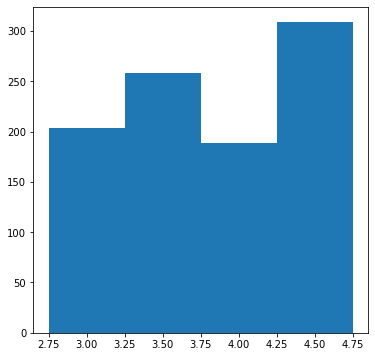

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
height=df.groupby('rating').mean()['review_count']
x=height.index
ax.bar(x,height, width=0.5);